In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
df1 = pd.read_csv('last12months/12months/204300479.csv')
df2 = pd.read_csv('last12months/12months/220330932.csv')
df3 = pd.read_csv('last12months/12months/224228487.csv')

/home/leonardo/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (21,23,25,27,51) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/leonardo/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (24,26,49,50,51,53) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df1['dt'] = pd.to_datetime(df1['TIMESTAMP'],unit='ms')
df2['dt'] = pd.to_datetime(df2['TIMESTAMP'],unit='ms')
df3['dt'] = pd.to_datetime(df3['TIMESTAMP'],unit='ms')

In [4]:
def cleanCSV(df):
  cols_to_check = df.columns
  arr_col = []
  for col in df.columns:
    if df[col].isna().all():
        print("La colonna", col, "contiene solo valori NaN.")
        arr_col.append(col)
  df_cleaned = df.drop(columns=arr_col)
  return df_cleaned

In [5]:
def sortDf(df):
    if 'TIMESTAMP' in df.columns:
        df = df.sort_values('TIMESTAMP',ascending=True)
        df.index = range(len(df))
    else:
        print("La colonna TIMESTAMP non è presente nel dataframe.")
        return None
    return df

In [6]:
def resampleDf(df,datetime):
    if 'dt' in df.columns:
        df.set_index('dt', inplace=True)
    df_noNan = df.ffill()
    df_resampled = df_noNan.resample(datetime).ffill()

    return df_resampled
    

In [7]:
def checkFileInFolder(folder, file):
    if file in os.listdir(folder):
        return True
    return False

In [8]:
if not checkFileInFolder(folder ='last12months/12months',file='204300479_resampled30s.csv'):
    df1_sorted = sortDf(df1)
    df1_sorted = cleanCSV(df1_sorted)
    df1_resampled = resampleDf(df1_sorted,'30s')
    df1_resampled.to_csv('last12months/12months/204300479_resampled30s.csv')
else:
    df1_resampled = pd.read_csv('last12months/12months/204300479_resampled30s.csv')

if not checkFileInFolder(folder ='last12months/12months',file='220330932_resampled30s.csv'):
    df2_sorted = sortDf(df2)
    df2_sorted = cleanCSV(df2_sorted)
    df2_resampled = resampleDf(df2_sorted,'30s')
    df2_resampled.to_csv('last12months/12months/220330932_resampled30s.csv')
else:
    df2_resampled = pd.read_csv('last12months/12months/220330932_resampled30s.csv')

if not checkFileInFolder(folder ='last12months/12months',file='224228487_resampled30s.csv'):
    df3_sorted = sortDf(df3)
    df3_sorted = cleanCSV(df3_sorted)
    df3_resampled = resampleDf(df3_sorted,'30s')
    df3_resampled.to_csv('last12months/12months/224228487_resampled30s.csv')
else:
    df3_resampled = pd.read_csv('last12months/12months/224228487_resampled30s.csv')


/home/leonardo/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (21,23,25,27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/leonardo/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (19,22,24,26,28,50,51,52,54) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
def getUniques(df):
    cols = df.columns
    dict_unique = dict.fromkeys(cols,None)
    for col in cols:
        dict_unique[col] = df[col].unique()
    return dict_unique

In [10]:
def printUniques(dict,tp):
    for key, value in dict.items():
        if len(value) < 4 and 1 in value and tp ==1:
            print(key, value)
        elif tp==2 and len(value) > 4 and np.isnan(value[0]):
            print(key, value[0:5])

In [11]:
def getBooelan(dict):
    arr = []
    for key, value in dict.items():
        if len(value) < 4 and 1 in value:
            arr.append(key)
    return arr

In [12]:
dict_unique1 = getUniques(df1_resampled)
dict_unique2 = getUniques(df2_resampled)
dict_unique3 = getUniques(df3_resampled)



In [14]:
arr_booleani1 = getBooelan(dict_unique1)
arr_booleani2 = getBooelan(dict_unique2)
arr_booleani3 = getBooelan(dict_unique3)

In [15]:
print('1')
printUniques(dict_unique1,1)
print("--------------------------------------------------\n2")
printUniques(dict_unique2,1)
print("--------------------------------------------------\n3")
printUniques(dict_unique3,1)

1
Abilitazione al conteggio energia [nan  1.]
Connection Status [nan  0.  1.]
Fattore di correzione [nan  1.]
Flame status [nan  0.  1.]
Modalità Estate/Inverno (solo scrittura) [nan  1.  2.]
Riscaldamento attivo [nan  0.  1.]
Riscaldamento on [nan  0.  1.]
Sanitario attivo [nan  0.  1.]
Sanitario on [nan  0.  1.]
--------------------------------------------------
2
Abilitazione al conteggio energia [nan  1.]
Connection Status [nan  0.  1.]
Fattore di correzione [nan  1.]
Flame status [nan  0.  1.]
Riscaldamento attivo [nan  0.  1.]
Riscaldamento on [nan  0.  1.]
Sanitario attivo [nan  0.  1.]
Sanitario on [nan  0.  1.]
--------------------------------------------------
3
Abilitazione al conteggio energia [nan  1.]
Connection Status [nan  0.  1.]
Flame status [nan  1.  0.]
Riscaldamento attivo [nan  1.  0.]
Riscaldamento on [nan  1.  0.]
Sanitario attivo [nan  0.  1.]
Sanitario on [nan  0.  1.]
Fattore di correzione [nan  1.]


In [16]:
def plotColumn(df,col):
    if col not in df.columns:
        print("La colonna", col, "non è presente nel dataframe.")
        return None
    df_toPlot = df[col]
    plt.plot(df_toPlot)
    try: 
        plt.ylim(0, max(df_toPlot.unique())+1)
    except:
        pass

    plt.show()


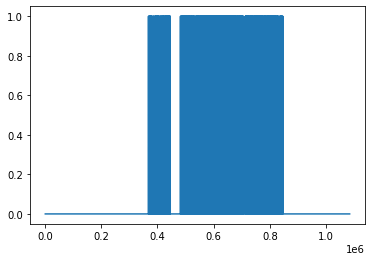

In [17]:
plotColumn(df1_resampled,'Riscaldamento attivo')

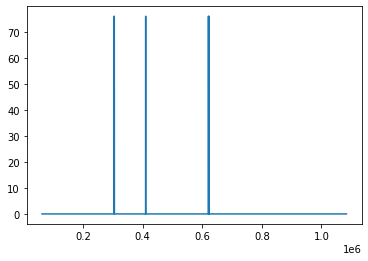

In [18]:
plotColumn(df2_resampled,'Anomalia #1')


In [20]:
df_test = df1_resampled.copy()
for col in arr_booleani2:
    df_test[col] = df_test[col].replace(np.nan,0)
df_test.head(10)

,dt,TIMESTAMP,Abilitazione al conteggio energia,Anomalia #1,Caldaia,Caldaia giornaliero,Connection Status,Energia parziale in riscaldamento caldaia,Energia parziale in sanitario caldaia,Energia totale globale,...,Stato attivazione BOOST sanitario,Taratura sensore,Temperatura di mandata,Temperatura esterna,Temperatura esterna mediata,Temperatura fumi,Temperatura sanitario,Temperatura scambiatore,Velocita' ventilatore,WiFi signal
0,2022-06-30 22:00:00,1656626400000,0.0,NaN,NaN,739466.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-06-30 22:00:30,1656626428307,0.0,NaN,NaN,739466.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,2022-06-30 22:01:00,1656626449120,0.0,NaN,NaN,739466.0,0.0,NaN,NaN,NaN,...,NaN,NaN,42.1,NaN,NaN,NaN,40.4,NaN,0.0,-66.0
3,2022-06-30 22:01:30,1656626489432,0.0,NaN,NaN,739466.0,0.0,NaN,NaN,NaN,...,NaN,NaN,42.1,NaN,NaN,NaN,40.1,NaN,0.0,-60.0
4,2022-06-30 22:02:00,1656626519228,0.0,NaN,NaN,739466.0,0.0,NaN,NaN,NaN,...,NaN,NaN,41.7,NaN,NaN,NaN,39.8,NaN,0.0,-60.0
5,2022-06-30 22:02:30,1656626549013,0.0,NaN,NaN,739466.0,0.0,NaN,NaN,NaN,...,NaN,NaN,41.7,NaN,NaN,NaN,39.8,NaN,0.0,-60.0
6,2022-06-30 22:03:00,1656626569900,0.0,NaN,NaN,739466.0,0.0,NaN,NaN,NaN,...,NaN,NaN,41.4,NaN,NaN,NaN,39.6,NaN,0.0,-59.0
7,2022-06-30 22:03:30,1656626599792,0.0,NaN,NaN,739466.0,0.0,NaN,NaN,NaN,...,NaN,NaN,41.3,NaN,NaN,NaN,39.4,NaN,0.0,-60.0
8,2022-06-30 22:04:00,1656626630796,0.0,NaN,NaN,739466.0,0.0,NaN,NaN,NaN,...,NaN,NaN,41.3,NaN,NaN,NaN,39.4,NaN,0.0,-60.0
9,2022-06-30 22:04:30,1656626658438,0.0,NaN,NaN,739466.0,0.0,NaN,NaN,NaN,...,NaN,NaN,41.1,NaN,NaN,NaN,39.2,NaN,0.0,-61.0


In [ ]:
df1_anomalia = df1_resampled['Anomalia #1']
df1_anomalia.head(1150)

In [ ]:
df_prova = df1_resampled.bfill()
df_prova.head(20)

In [ ]:
df1_anomalia_noNan = df1_anomalia.dropna()
df1_anomalia_noNan.head()


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df1 = pd.read_csv('last12months/12months/204300479.csv')
df2 = pd.read_csv('last12months/12months/220330932.csv')
df3 = pd.read_csv('last12months/12months/224228487.csv')

In [ ]:
df1['dt'] = pd.to_datetime(df1['TIMESTAMP'],unit='ms')
df2['dt'] = pd.to_datetime(df2['TIMESTAMP'],unit='ms')
df3['dt'] = pd.to_datetime(df3['TIMESTAMP'],unit='ms')

In [ ]:
def cleanCSV(df):
  cols_to_check = df.columns
  arr_col = []
  for col in df.columns:
    if df[col].isna().all():
        print("La colonna", col, "contiene solo valori NaN.")
        arr_col.append(col)
  df_cleaned = df.drop(columns=arr_col)
  return df_cleaned

In [ ]:
def sortDf(df):
    if 'TIMESTAMP' in df.columns:
        df = df.sort_values('TIMESTAMP',ascending=True)
        df.index = range(len(df))
    else:
        print("La colonna TIMESTAMP non è presente nel dataframe.")
        return None
    return df

In [ ]:
def resampleDf(df,datetime):
    if 'dt' in df.columns:
        df.set_index('dt', inplace=True)
    df_noNan = df.ffill()
    df_resampled = df_noNan.resample('30s').ffill()

    return df_resampled
    

In [ ]:
df1_sorted = sortDf(df1)
df2_sorted = sortDf(df2)
df3_sorted = sortDf(df3)

In [ ]:
df1_sorted = cleanCSV(df1_sorted)
df2_sorted = cleanCSV(df2_sorted)
df3_sorted = cleanCSV(df3_sorted)

In [ ]:
df1_sorted.at[0,'Abilitazione al conteggio energia'] = 0
df1_sorted.iloc[0]

In [ ]:
# df1_sorted.set_index('dt', inplace=True)
# df_prova = df1_sorted['Caldaia giornaliero']
# df_prova = df1_sorted['Abilitazione al conteggio energia']

df_noNan = df1_sorted.ffill()

In [ ]:
df1_resampled = resampleDf(df1_sorted,'30s')
df2_resampled = resampleDf(df2_sorted,'30s')
df3_resampled = resampleDf(df3_sorted,'30s')

In [ ]:
df1_resampled.to_csv('last12months/12months/204300479_resampled60s.csv')
df2_resampled.to_csv('last12months/12months/220330932_resampled60s.csv')
df3_resampled.to_csv('last12months/12months/224228487_resampled60s.csv')

In [ ]:
df1_sorted['Anomalia #1'].unique()

In [ ]:
df1_resampled

In [ ]:
def getUniques(df):
    cols = df.columns
    dict_unique = dict.fromkeys(cols,None)
    for col in cols:
        dict_unique[col] = df[col].unique()
    return dict_unique

In [ ]:
def printUniques(df):
    for key, value in df.items():
        if len(value) < 4 and 1 in value:
            print(key, value)

In [ ]:
dict_unique1 = getUniques(df1_resampled)
dict_unique2 = getUniques(df2_resampled)
dict_unique3 = getUniques(df3_resampled)



In [ ]:
printUniques(dict_unique1)

In [ ]:
printUniques(dict_unique2)

In [ ]:
dict_unique3['Fattore di correzione']

In [ ]:
printUniques(dict_unique3)

In [ ]:
df1_resampled[df1_resampled['Abilitazione al conteggio energia'] == 1]

In [ ]:
df1_resampled_cleaned = cleanCSV(df1_resampled)
df1_resampled_cleaned

In [ ]:

df_ab = df1_resampled['Caldaia giornaliero']


plt.plot(df_ab)

plt.show()

In [ ]:
import math
# df_ab[df_ab == math.nan]
# [x for x in df_ab if not math.isnan(x)]
[x for x in df_ab if x==0]


In [ ]:
d1 = pd.read_csv('last12months/20230721-153054/204300479_LUNA IN PLUS AIR.csv')
d2 = pd.read_csv('last12months/20230721-153054/220330932_LUNA IN PLUS AIR.csv')
d3 = pd.read_csv('last12months/20230721-153054/224228487_LUNA IN PLUS AIR.csv')

In [ ]:
d1

In [ ]:
d1 = cleanCSV(d1)
d1['dt'] = pd.to_datetime(d1['TIMESTAMP'],unit='ms')
d1_sorted = sortDf(d1)
d1_resampled = resampleDf(d1_sorted,'30s')

In [ ]:
d1_resampled




In [ ]:
d1_resampled.tail(50).to_csv('last12months/d1.csv')

In [ ]:
df1_resampled.head(50).to_csv('last12months/df1.csv')